In [3]:
import pandas as pd 
jobs = pd.read_csv(r'C:\Users\jcars\OneDrive\HII_internshipProject\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')
supply = pd.read_csv(r'C:\Users\jcars\OneDrive\HII_internshipProject\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-supply-data.csv')

C:\Users\jcars\AppData\Local\Temp\ipykernel_9128\2143321850.py:2: DtypeWarning: Columns (3,4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  jobs = pd.read_csv(r'C:\Users\jcars\OneDrive\HII_internshipProject\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')


In [ ]:
### Proprotions of frequencies table
jobs['apl'].value_counts(normalize = 'True').round(2) #Proportions using normalize 

#Takeaway: apl's have varying length. Primarily length 9, 11, or 8. 

apl_lengths = [len(s) for s in jobs['apl'].astype('string').dropna()]  #Table displays how often an apl has 8 characters, 9 characters, etc. 
df = pd.DataFrame({'length':apl_lengths}) 
table = df['length'].value_counts().reset_index()
table 

In [3]:
#looking at components of location
sub = jobs[jobs['location'].str.count('-') == 3]
components = sub['location'].str.split("-", expand = True)
components = components.rename(columns = {0: 'Level', 1: 'Front to Back', 2: 'Distance from Center', 3: 'Purpose'})


# components['Level'].value_counts(normalize=True).round(2)
# components['Front to Back'].value_counts(normalize=True).round(2)
# components['Distance from Center'].value_counts(normalize=True).round(2)
# # components['Purpose'].value_counts(normalize=True).round(2)

Supply Data Exploration

In [4]:
supply['issue_date'] = pd.to_datetime(supply['issue_date'])   #Creating days_waiting variable that shows long the staff had to wait before receiving a part after requesting it. 
supply['demand_date'] = pd.to_datetime(supply['demand_date'])
supply['days_waiting'] = supply['issue_date'] - supply['demand_date']
supply['days_waiting'] = supply['days_waiting'].astype('string')
supply['days_waiting'] = supply['days_waiting'].str.split('d', n=1).str[0]
supply['days_waiting'] = supply['days_waiting'].dropna().astype('int64')

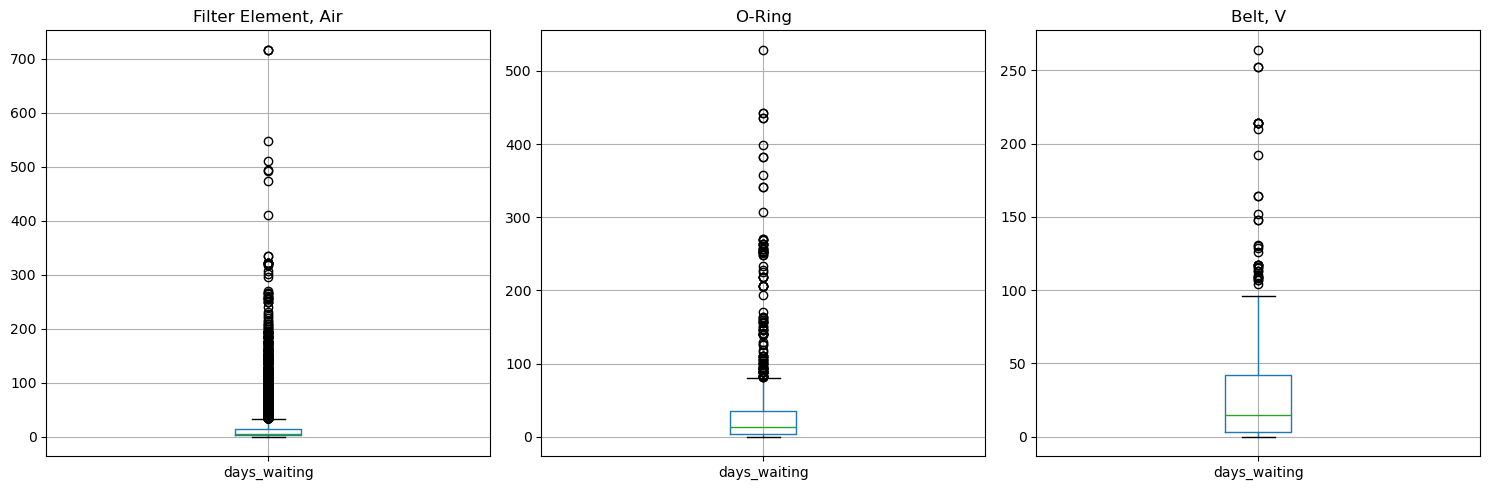

In [5]:
#Comparing the amount of days waited for different types of parts

supply['days_waiting'] = supply['days_waiting'].abs()  #Convert to absolute value. Assuming that negative values are due to dates being recorded in reverse. 

import matplotlib.pyplot as plt
supply['days_waiting'].describe().round(2) #mean 40 vs median 11

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

supply[supply['niin_nomenclature'] == 'FILTER ELEMENT,AIR'].boxplot(column ='days_waiting', ax=axs[0])  #11.5k records
axs[0].set_title('Filter Element, Air')

supply[supply['niin_nomenclature'] == 'O-RING'].boxplot(column ='days_waiting', ax=axs[1]) #1.2k records
axs[1].set_title('O-Ring')

supply[supply['niin_nomenclature'] == 'BELT,V'].boxplot(column ='days_waiting', ax=axs[2]) #900 records
axs[2].set_title('Belt, V')

plt.tight_layout()
plt.show()

#Goal: 
#Compare days waiting for different niin_nonenclatures to see if there is any meaningful differences.

#First, need days_waiting column to have no negative values. 

#Now, want to compare plots for these 3 most common niin_nomenclatures

# Unexpected Pattern in Hours Worked and Days Open
days_open has median 159, mean 320 <br>
Total hours worked has median 8, mean 34 <br> 
<br>
*Total hours worked is total_ship_force_man_hours + total_ima_man_hours

# Codes and their Corresponding Text Variables w # of NAs

cause_code                               | 0                        cause         | 0  <br> <br>
action_taken_code                        | 11233                   action_taken   | 0  <br> <br>
deferral_reason_code                     | 24                     deferral_reason | 24 <br> <br>
priority_code                            | 25                       priority      | 25  <br> <br>
tycom_screening_code                     | 9026                  tycom_screening  | 9031<br> <br>
type_availability_code                   | 25        type_of_availability_needed  | 25<br> <br>
status_code                              | 1                  component_status    | 1<br> <br>
when_discovered_code                     | 0                  when_discovered     | 2637<br> <br>

# Repeated # Of NAs [Due to the job being unfinished at the time of finalizing this dataset]

action_taken_code                        | 11233 <br> <br>
action_taken                             | 11830<br> <br>
date_closing                             | 11233<br> <br>
closing_ship_system                      | 11705<br> <br>
eswbs_closing                            | 11705<br> <br>

# A Note on eswbs_closing 

All but 23 records have the same eswbs_opening and eswbs_closing, excluding the records that are NA for eswbs_closing (job was never closed)
<br>

All but 23 records also have the same opening_ship_system and closing_ship_system. 